<a href="https://colab.research.google.com/github/ayush2281/Pytorch-for-ML-DL-/blob/main/Chapter_01_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pytorch Workflow
Let's Explore a an example Pytorch end-to-end workflow.

Resources:
* Ground Truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb

*Book version of notebook*

what_were_covering =  1: 'Data (prepare and load)'
                       
                       
                       2: build Model
                       3: 'fiting model to the data (training)'
                       4: 'making the  predicition and evaluating a model (inference)'
                       5: 'saving and loading a model'
                       6: 'putting it all together'
                       
                      
                    

In [9]:
import torch
from torch import nn # nn contains all of pytorch's building block for nn
import matplotlib.pyplot as plt #The torch module in PyTorch is fundamental for building and training neural networks.
import numpy as np

# check the Pytorch version
torch.__version__ # we are checking the version of the processor that we are working on


'2.4.1+cu121'

1. 'Data (prepare and load)'
data can be ananything in the ml.


Data can all most anything.. in ml

* Excel speadsheet(CSV)
* image of any kind
* video (YOutu be has lots of data)
* Audio like songs or podcast
* DNA
* TEXT

## Ml is game of two part:
1. Get Data into a numerical representation
2. build a model to learn a pattern in that numerical representation

To showcae this , lets create some *knwon* data using the linear regression formula.

We'll  use linear regression formula to make a straight line with known parameter.

In [2]:
# Create *known* parameter
weight = 0.7
bias = 0.5

# create a data
start =0 # starting from
end =1 # end on 0.02 steps every time till 1.
step = 0.02 # it will takle # x = torch.arange(start,end,step).unsqueeze(dim=1)
x = torch.arange(start,end,step)  # torch.arange use for the genrating range
# print(torch.range(10,20)) for the example

y = weight * x + bias   # equation of the straight line

x[:10],y[:10], len(x), len(y)

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.5000, 0.5140, 0.5280, 0.5420, 0.5560, 0.5700, 0.5840, 0.5980, 0.6120,
         0.6260]),
 50,
 50)

In [11]:
len(x), len(y)

(50, 50)

  spliting data into training and testing sets (one of the most important concept in machine learning in general)..

lets create an train and test with our data

In [12]:
# create an train test split
train_split  = int(0.8 * len(x))
x_train, y_train = x[:train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

**X_train contains the features and y_train contains the labels (or targets). The model learns to predict the labels based on the features.*

In [5]:
x_train, y_train

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.5000, 0.5140, 0.5280, 0.5420, 0.5560, 0.5700, 0.5840, 0.5980, 0.6120,
         0.6260, 0.6400, 0.6540, 0.6680, 0.6820, 0.6960, 0.7100, 0.7240, 0.7380,
         0.7520, 0.7660, 0.7800, 0.7940, 0.8080, 0.8220, 0.8360, 0.8500, 0.8640,
         0.8780, 0.8920, 0.9060, 0.9200, 0.9340, 0.9480, 0.9620, 0.9760, 0.9900,
         1.0040, 1.0180, 1.0320, 1.0460]))

How might we better visualize out data?

this is where the data explore's motto comes in!

'Visalise , Visualize, Visualize'



In [6]:
def plot_prediction(train_data=x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    prediciton =None):
  """
  Plots training data, test data and compares predicitons

  """
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="test data")

  # are there prediction

  if prediciton is not None:
    #plot the predicition if they exist
    plt.scatter(test_data, prediciton, c="g", s=4, label="prediciton data")

  #show the legend
  plt.legend(prop={"size":14})


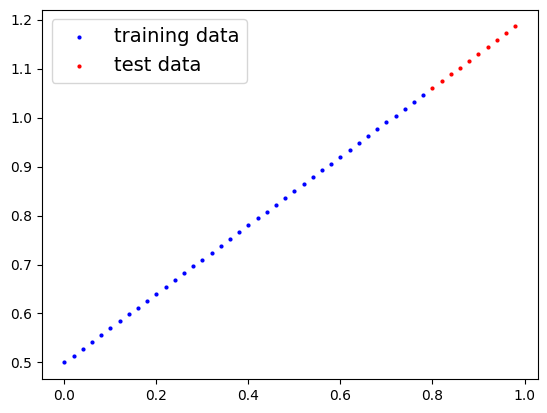

In [7]:
plot_prediction();

##2. Building  a model!

wohhh that's exciting, let's do it!

## What Our doesweight and bias
* starts with random values (weight and bias)
* look at the training data and adjust the random values to better represent (or get to the *closer*) to the ideal values (the weight & bias values we used to create the data)

## How does it to do so ?
1. Gradient descent --> resource -> YT(3blue1brown)
2. Backpropagation --> resource -> YT(3blue1brown)

In [13]:
import torch
import torch.nn as nn

# create an linear model
class linearRegreassionModel(nn.Module): # subclass nn.module
    def __init__(self):
        super().__init__()
        # initialize the model parameter
        # (requires_grad=True) means pytorch will track the gradient of this specific parameter for use with torch.autograd and gradient descent
        self.weights = nn.Parameter(torch.randn(1,
                                                dtype=torch.float,
                                                requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1,
                                             dtype=torch.float,
                                             requires_grad=True))
    def forward(self, x: torch.Tensor): # forward method to define the computational in the model, 'x' is the input
      return self.weights * x + self.bias # this is the linear regression formula

##pytorch module
   1. torch.nn : Contains all the building blocks for neural networks
   2. torch.nn.Module : The base class for all neural network module
   3. torch.optim : Contains various optimization algorithms like SGD, Adam, etc.
   4. torch.utils.data.dataset :
   5. torch.utils.data.DataLoader
   6. torch.nn.Parameter

   *for more visit this page* https://pytorch.org/tutorials/beginner/ptcheat.html


### pytorch model building essential

 **PytorchModule** |  **What does it do**
* torch.nn --> contains all buildings for computational graphs (a neural * network can we consider a computational graph)
* torch.nn.Parameter -what parametr should our model try and lern , often a pytorch layer from torch.nn will set these for   us
* torch.nn.module - the base clss for all neural network modules , if you subclass it , should overwrite forword()

In [16]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

## checkings the contains of our Pytorch model

Now we've created a model, let's see whats  inside it.

so we can checklout model parameters or whats inside our model uisng .parameter().

In [17]:
## creare an random seed
torch.manual_seed(42)

# create an instance of the model (this is a subclass od nn.Module)
model_0 = linearRegreassionModel()

list(model_0.parameters())


[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [18]:
# list the named parameter
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [19]:
weight , bias

(0.7, 0.5)

check why the both weigt and bias value is different.

### making prediction using torch.inference_mode()

To check our model predictive power , lts see how well it predictes y_test base on X_test.

when we pass data through our model , its going to rin it through the forward() method.

In [20]:
x_test, y_test

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([1.0600, 1.0740, 1.0880, 1.1020, 1.1160, 1.1300, 1.1440, 1.1580, 1.1720,
         1.1860]))

x_test contains the features of the test dataset, and y_test contains the corresponding labels or targets.

In [21]:
# yeah this one and next one have same output but it contains the gradient and another one not contain the gradient calculation
y_preds= model_0(x_test)
y_preds



tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588], grad_fn=<AddBackward0>)

In [22]:
 # make prediction with model
# with torch.inference_mode(): # pytorch.inference disable the gradient calculation(weight)
#   y_preds = model_0(x_test)

# y_preds

with torch.no_grad(): # the both snipets having same output and in othr words youy can you use either one.
  y_preds = model_0(x_test)
y_preds


tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

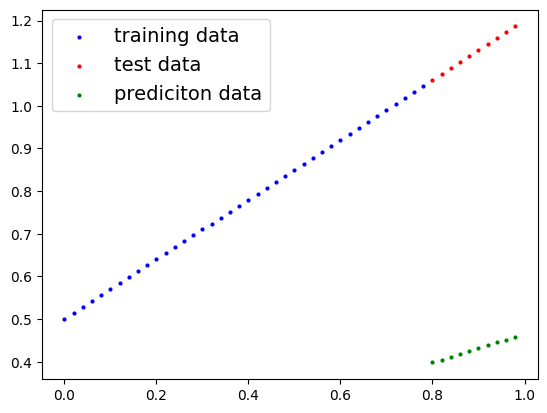

In [24]:
plot_prediction(prediciton=y_preds)

## 3. train model
* The whole idea is training for a model to move from some unknown parameter (these may be random) to some known parameter.
* or in other words from poor representaion of the data to a better representation of the data.

* oneway to measure how poor/ wrong model are . use loss function

*Note* : Loss function may also called cost fucntion or criteria in different areas .

**Loss Fucntion** A fucntion to measure how wrong ur model prediction are to the ideal/actual output, Lower is better.

**optimizer** : takes into account the loss funtion  of a model and adjust the model parameter(e.g. weight & bias)

And specially for pytorch ⁉
1. A training loop
2. A testing loop

*for more visit:* https://pytorch.org/docs/stable/nn.html#loss-functions

In [ ]:
# checkout the model paramter(a parametr is a value that tghe model sets itself)
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [25]:
# using the Mean absolute error to calculate how much function is wrong
MAE_loss = torch.mean(torch.abs(y_preds - y_test))
MAE_loss

tensor(0.6945)

**Accuracy vs. Loss: Accuracy measures the percentage of correctly classified instances, while loss measures the difference between predicted and actual values. These two metrics are related but not interchangeable.**

In [28]:
#setup the losss function
loss_fn = nn.L1Loss()


#setup optimizer
optimizer =  torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)  #learning_rate - >,the small learning rate small change in parameter, the large learning rate the large change in parameter
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

which loss funtion and optimizer i should use...--> nn.L1Loss() ,
torch.optimSGD()

### Building a training and test  looop in pytorch

A couple of thing we need in a training loop:
0. Loop throgh the data
1. forword pass (this involve data moving throgh our models forword()' fucntion) to make prediciton on data - also called forword propagation
2. calculate the loss fucntion (compare forword passs prediction to ground truth labels)
3. Optimizeer zero grad
4. loss backword - move backwisse through the network to calculate the gradient of each of the parameter of our model with respect to the loss(**backpropogation**)
5. optimizer step - use the optimizer to adjust models parameter to try and improve the loss.(**Gradient descent**)


In [29]:
with torch.no_grad():
  list(model_0.parameters())

In [30]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [33]:
# an epochs is the one loop through the data .. (this is hyperparameter because we've set)
epochs = 200


#Track the different values:
epoch_count = []
train_loss_values = []
test_loss_values = []

##Training
# 0 Loop through the data
for epochs in range(epochs):
  # set the model to training data
  model_0.train() # train mode  in pytorch set all parameter that require gradient to require gradient

  model_0.eval() # turns of gradient tracking, and eval is used for the evaluating the mdodel
  # 1. forward pass
  y_preds = model_0(x_train)

  # 2. calculate the loss
  loss = loss_fn(y_preds, y_train) # y_prds contains the prediction values , and the y_train contains the labels and target value of the dataset
  print(f"loss",loss)

  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backword
  loss.backward()

  # 5. optimizer step
  optimizer.step() ## by default how the optimizeer change will accumulate through the loop so.. we have to zero them in step 3 for the next itteration of the loop.
  ##testing
  model_0.train() # turns of different settings in the model not needed for evaluting/testing(dropout)
  with torch.inference_mode(): # turns off gradient tracking & a couple  more things behind the scenes
  # with torch.no_grad():    # in the older version of the pytorch also se torch.no_grad():

    # 1. do the forward pass
    test_pred = model_0(x_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred, y_test)
  # print out what's happenin'
  if epochs % 10 == 0:
    epoch_count.append(epochs)
    train_loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epochs: {epochs} | Loss: {loss} | Test Loss: {test_loss}")
    # print out the model state_dist
    print(model_0.state_dict())


loss tensor(0.0069, grad_fn=<MeanBackward0>)
Epochs: 0 | Loss: 0.006928838789463043 | Test Loss: 0.008951961994171143
OrderedDict([('weights', tensor([0.6913])), ('bias', tensor([0.4988]))])
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
Epochs: 10 | Loss: 0.006928838789463043 | Test Loss: 0.008951961994171143
OrderedDict([('weights', tensor([0.6913])), ('bias', tensor([0.4988]))])
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
loss tensor(0.0046, grad_fn=<MeanBackward0>)
loss tensor(0.0069, grad_fn=<MeanBackward0>)
loss tensor(0.0046, grad_fn=<Mea

In [34]:
epoch_count, train_loss_values, test_loss_values

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>),
  tensor(0.0069, grad_fn=<MeanBackward0>)],
 [tensor(

In [35]:
#the line converts train_loss_values to a NumPy array for compatibility and analysis,
#while test_loss_values are likely already in a suitable format and included as a tuple.


import  numpy as np
np.array(torch.tensor(train_loss_values).numpy()), test_loss_values

(array([0.00692884, 0.00692884, 0.00692884, 0.00692884, 0.00692884,
        0.00692884, 0.00692884, 0.00692884, 0.00692884, 0.00692884,
        0.00692884, 0.00692884, 0.00692884, 0.00692884, 0.00692884,
        0.00692884, 0.00692884, 0.00692884, 0.00692884, 0.00692884],
       dtype=float32),
 [tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090),
  tensor(0.0090)])

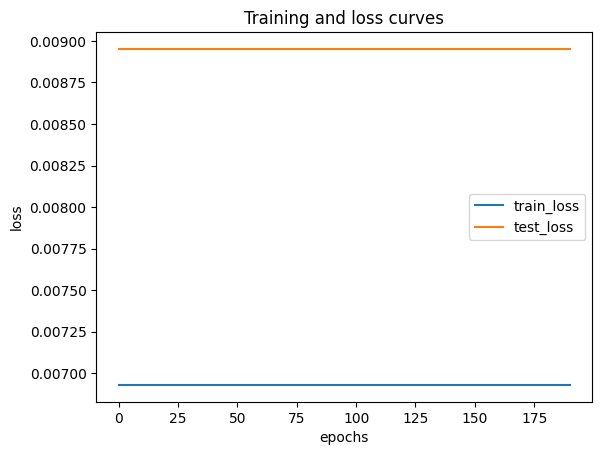

In [36]:
# plot the loss curves
plt.plot(epoch_count, np.array(torch.tensor(train_loss_values).numpy()), label="train_loss")
plt.plot(epoch_count, test_loss_values, label="test_loss")
plt.title("Training and loss curves")
plt.ylabel("loss")
plt.xlabel("epochs")
plt.legend();

In [37]:
with torch.inference_mode(): # disable the gradientb descent tracking
  y_preds_new = model_0(x_test)

In [38]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6952])), ('bias', tensor([0.5088]))])

In [39]:
weight, bias


(0.7, 0.5)

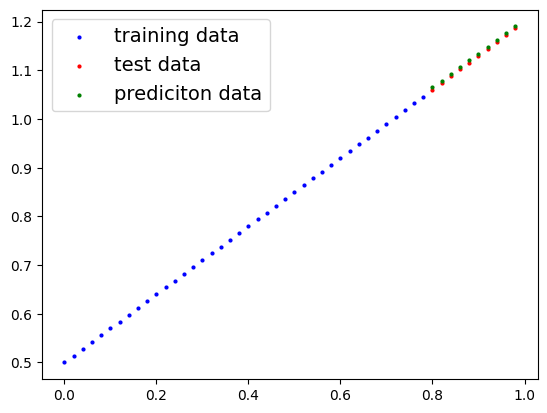

In [40]:
plot_prediction(prediciton=y_preds_new);

##Saving the model in pytorch
there is three main method to savinfg anf loading the model in the pytorch..

1.` torch.save()` -> allows you to save a  pytoch object in Pytorch pickle format.
2. `torch.load()` -> allows you to the load a saved model Pytorch object
3. `torch.nn.Module.load.state.dict()` - this allows to load a model's saves state dicrtionary.


In [41]:
# saving Our pytorch model
from pathlib import Path
# 1. Create the models dictionary
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. create Model save path
Model_Name = "01_pytorch_workflow_model.pth"
Model_Save_Path = MODEL_PATH / Model_Name

Model_Save_Path

# 3. Save the Model in state_dict()
print(f'Saving Model to: {Model_Save_Path}')
torch.save(obj=model_0.state_dict(),
           f=Model_Save_Path)

Saving Model to: models/01_pytorch_workflow_model.pth


In [42]:
! ls -l models

total 4
-rw-r--r-- 1 root root 1668 Oct 17 14:42 01_pytorch_workflow_model.pth


## loading the pytorch model
Since we saved our model's `state_dict()` rather entire model, we'll create a new instance of our mdodel class and load the save `state_dict()` into that.


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6952])), ('bias', tensor([0.5088]))])

In [44]:
# To load in saved state_dict we have to instantiate a new instance of our model class
loaded_model_0= linearRegreassionModel()

#load the saved model state_dict of model_0 (this will updatre the new instance with the update parameter)
loaded_model_0.load_state_dict(torch.load(f=Model_Save_Path))

<ipython-input-44-d1252fdbf28a>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=Model_Save_Path))


<All keys matched successfully>

In [45]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6952])), ('bias', tensor([0.5088]))])

In [46]:
# Make some prediction with our loaded model
loaded_model_0.eval()
with torch.inference_mode(): # disable the grad tracking
  y_preds = model_0(x_test)

y_preds

tensor([1.0650, 1.0789, 1.0928, 1.1067, 1.1206, 1.1345, 1.1484, 1.1623, 1.1762,
        1.1901])

In [49]:
# Make predictions with the loaded model
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

In [51]:
# Make predictions with the original model
with torch.inference_mode():
    original_model_preds = model_0(x_test)

# ... (Load the saved model as before) ...

# Make predictions with the loaded model
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

# Compare predictions
comparison_result = original_model_preds == loaded_model_preds  # This will compare element-wise
# Check if all predictions are equal using torch.all()
all_equal = torch.all(comparison_result)
print(f"All predictions are equal: {all_equal}")

All predictions are equal: True


In [ ]:
y_preds

tensor([1.0650, 1.0789, 1.0928, 1.1067, 1.1206, 1.1345, 1.1484, 1.1623, 1.1762,
        1.1901])

## Putting everything together

Lets go back throgh the steps above and see it all in one place


In [52]:
## import pytorch
import torch
from torch import nn
import matplotlib.pyplot as plt

# check the Pytorch version
torch.__version__

'2.4.1+cu121'

## Create device-agnostic code:
this means if we've got access to a GPU, our will use it(for ptenitiallyt faster computing)

* if no GPU is available, the code will default to using CPU.


In [55]:
## Steup
#device to agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device", device)

Using device cpu


In [56]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


because i am not using the paid version of colab.

In [58]:
def plot_prediction(train_data=x_train,
                    train_labels = y_train,
                    test_data = x_test,
                    test_labels = y_test,
                    prediciton =None):
  """
  Plots training data, test data and compares predicitons

  """
  #plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="training data")

  #plot test data in red
  plt.scatter(test_data, test_labels, c="r", s=4, label="test data")

  # are there prediction

  if prediciton is not None:
    #plot the predicition if they exist
    plt.scatter(test_data, prediciton, c="g", s=4, label="prediciton data")

  #show the legend
  plt.legend(prop={"size":14})


In [59]:
# create some data uisng linear regression formula y = w*x + b
weight = 0.7
bias = 0.3

# create range values

start = 0
end = 1
step = 0.02

# create x and y feature label
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [60]:
# split the data
train_split = int(0.8*len(x))
x_train, y_train =x[ :train_split], y[:train_split]
x_test, y_test = x[train_split:], y[train_split:]
len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

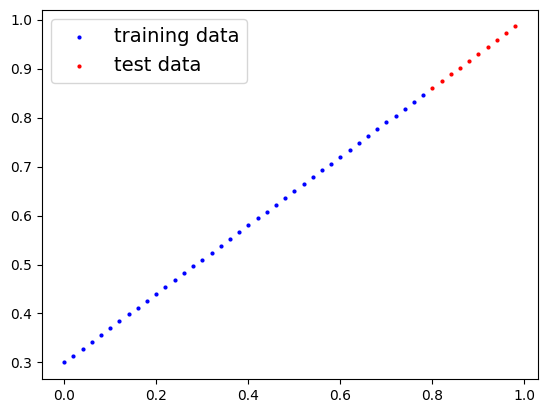

In [61]:
# plot the data
#Note : if don;t hace the plot preiction () fucntion loaded , this will eror
plot_prediction(x_train,y_train,x_test, y_test)

### 6.2 building the pytorch Linear model


*For more vist: * https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

In [63]:
## create the linerar model by  subclassing nn.Module
class LinearPregressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # intialize the model
    # use nn.Linear for creating the model parameter / also called linear transform, probing layer, fully connected layer
    self.linear_layer = nn.Linear(in_features=1,
                                  out_features=1)
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)

# set the manual seed
torch.manual_seed(42)

# create an instance of the model
model_1 = LinearPregressionModelV2()
model_1, model_1.state_dict()



(LinearPregressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [64]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [65]:
x_train[:5], y_train[:5]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [66]:
## check the model current device
next(model_1.parameters()).device

device(type='cpu')

In [67]:
# set the model to use the  target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

##6.3. Training
For training we need:
* Loss fucntion
* optimizer
* Training loop
* testing loop


In [68]:
#  setup losss function
loss_fn = nn.L1Loss() # Same as mae

# setup optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)

In [69]:
x_train.shape

torch.Size([40])

In [ ]:
import torch

torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)

# Print shapes to debug
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

# Ensure x_train is a 2D tensor
if len(x_train.shape) == 1:
    x_train = x_train.view(-1, 1)
elif len(x_train.shape) == 3:
    x_train = x_train.view(x_train.shape[0], -1)

# Determine input size
input_size = x_train.shape[1]

# Print shapes after reshaping
print(f"x_train shape after reshaping: {x_train.shape}")

for epoch in range(epochs):
    model_1.train()

    # 1. Do the forward pass
    y_preds = model_1(x_train)

    # 2. Calculate the loss
    loss = loss_fn(y_preds, y_train)

    # 3. Optimizer zero
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        test_preds = model_1(x_test)
        test_loss = loss_fn(test_preds, y_test)

    # Print out what is happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss.item()} | Test Loss: {test_loss.item()}")
        print(model_1.state_dict())


x_train shape: torch.Size([40])
y_train shape: torch.Size([40, 1])
x_train shape after reshaping: torch.Size([40, 1])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 1x1)

In [ ]:
model_1.state_dict()



In [ ]:
weight, bias

(0.7, 0.3)

In [ ]:
x_train.shape

torch.Size([40, 1])

## 6.4 Makaing and evaluating the mode


In [ ]:
# Turn mode into evaluation mode
model_1.eval()

# making the prediction on the test data
with torch.inference_mode():
  y_preds = model_1(x_test)
y_preds


RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x10 and 1x1)